<a href="https://colab.research.google.com/github/Harshra1-ultra/CNN/blob/main/stock_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key=""

In [3]:
!pip install -q yfinance

     |████████████████████████████████| 6.3 MB 32.8 MB/s 


In [4]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr


yf.pdr_override()

start = datetime.strptime('2000-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-09-04', '%Y-%m-%d')

df = pdr.get_data_yahoo("IOC.NS", start, end)


[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,21.666666,22.770832,20.833332,22.570833,8.476385,284400
2000-01-04,21.666666,22.333332,21.174999,22.033333,8.274528,292800
2000-01-05,22.075001,22.083332,21.416666,21.775000,8.177512,226800
2000-01-06,21.500000,21.916666,21.337500,21.674999,8.139956,217800
2000-01-07,21.658333,22.250000,21.104166,22.037500,8.276091,211800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,106.400002,108.199997,106.099998,107.349998,107.349998,12826846
2021-08-31,108.000000,111.300003,107.400002,110.849998,110.849998,22323605
2021-09-01,111.000000,111.699997,109.599998,110.750000,110.750000,11800119
2021-09-02,109.800003,110.349998,109.000000,110.150002,110.150002,11510399
2021-09-03,110.699997,113.500000,110.099998,113.099998,113.099998,15271194


In [7]:
df1 = df.reset_index()['Close']

In [8]:
df1

0        22.570833
1        22.033333
2        21.775000
3        21.674999
4        22.037500
           ...    
5403    107.349998
5404    110.849998
5405    110.750000
5406    110.150002
5407    113.099998
Name: Close, Length: 5408, dtype: float64

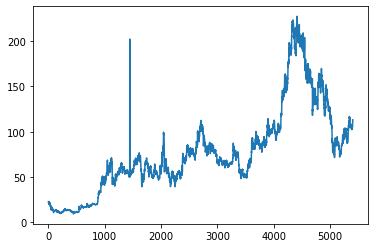

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

0        22.570833
1        22.033333
2        21.775000
3        21.674999
4        22.037500
           ...    
5403    107.349998
5404    110.849998
5405    110.750000
5406    110.150002
5407    113.099998
Name: Close, Length: 5408, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.06096908]
 [0.05850433]
 [0.05731973]
 ...
 [0.46532155]
 [0.46257021]
 [0.47609765]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(3515, 1893)

In [17]:
train_data

array([[0.06096908],
       [0.05850433],
       [0.05731973],
       ...,
       [0.19161985],
       [0.19597615],
       [0.20016049]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(3414, 100)
(3414,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(1792, 100)
(1792,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
54/54 [==============================] - 17s 228ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 2/5
54/54 [==============================] - 11s 205ms/step - loss: 5.0427e-04 - val_loss: 0.0017
Epoch 3/5
54/54 [==============================] - 11s 205ms/step - loss: 4.8566e-04 - val_loss: 0.0022
Epoch 4/5
54/54 [==============================] - 11s 204ms/step - loss: 4.6757e-04 - val_loss: 0.0032
Epoch 5/5
54/54 [==============================] - 11s 205ms/step - loss: 4.3779e-04 - val_loss: 0.0018


In [28]:
model.save('stock_Predict.h5')

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.6.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

57.50103566155655

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

127.98273519256948

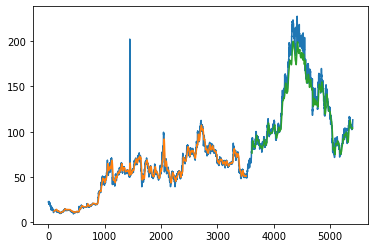

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

1893

In [37]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 1552)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.3574458169783787,
 0.3569299604197729,
 0.3573885112447065,
 0.35601282378472027,
 0.36862316388891436,
 0.37091595299876784,
 0.36581451822045513,
 0.3641522321217372,
 0.3576751098834382,
 0.34598187142911135,
 0.35928005526329854,
 0.36443883076046885,
 0.35973860608823216,
 0.35836295361343135,
 0.3546944770435916,
 0.3470709602503659,
 0.35962395963570243,
 0.36248994602301926,
 0.36650232696526286,
 0.3605984020044272,
 0.38679352458154026,
 0.3959073752872819,
 0.39648057256474534,
 0.4137337966223186,
 0.40439068799670275,
 0.40284304835051454,
 0.3982574701308076,
 0.3985440687695393,
 0.39928921823320457,
 0.4064541842014967,
 0.4302418712162265,
 0.43574458607098604,
 0.4462913949852008,
 0.4470938851677237,
 0.4496732729163088,
 0.4371202385457869,
 0.4392983812031106,
 0.4443425452329366,
 0.46056402118811285,
 0.4536283131396948,
 0.46411785130542277,
 0.46073597337431477,
 0.46772898715640493,
 0.4603347282830533,
 0.4708242314635959,
 0.4786770411618811,
 0.481886966

In [42]:
# demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=1551
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.35692996 0.35738851 0.35601282 ... 0.46532155 0.46257021 0.47609765]
0 day output [[0.43833587]]
1 day input [0.35738851 0.35601282 0.36862316 ... 0.46257021 0.47609765 0.43833587]
1 day output [[0.4403051]]
2 day input [0.35601282 0.36862316 0.37091595 ... 0.47609765 0.43833587 0.44030511]
2 day output [[0.44177037]]
3 day input [0.36862316 0.37091595 0.36581452 ... 0.43833587 0.44030511 0.44177037]
3 day output [[0.44268137]]
4 day input [0.37091595 0.36581452 0.36415223 ... 0.44030511 0.44177037 0.44268137]
4 day output [[0.44308653]]
5 day input [0.36581452 0.36415223 0.35767511 ... 0.44177037 0.44268137 0.44308653]
5 day output [[0.44307533]]
6 day input [0.36415223 0.35767511 0.34598187 ... 0.44268137 0.44308653 0.44307533]
6 day output [[0.44274536]]
7 day input [0.35767511 0.34598187 0.35928006 ... 0.44308653 0.44307533 0.44274536]
7 day output [[0.44218546]]
8 day input [0.34598187 0.35928006 0.36443883 ... 0.44307533 0.44274536 0.44218546]
8 day output [[0.4414

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

5408

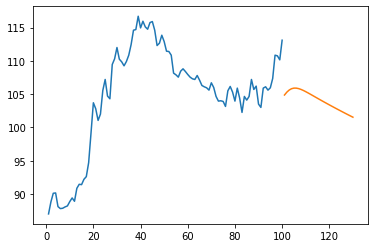

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[5308:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

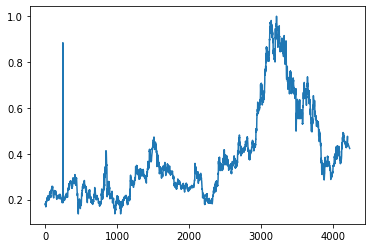

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

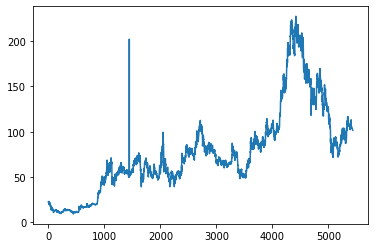

In [50]:
plt.plot(df3)